# Лабораторная работа №7. Классификация

In [1]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


# Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [4]:
df = pd.read_csv('/titanic.csv', index_col='PassengerId')

2. Выведете первые 7 строк набора.

In [5]:
print("Первые 7 строк данных:")
print(df.head(7))

Первые 7 строк данных:
             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                             Moran, Mr. James    male   NaN   
7                                      

# Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?

In [6]:
print("\nИнформация о данных:")
print(df.info())
print("\nПропущенные значения:")
print(df.isnull().sum())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None

Пропущенные значения:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [7]:
df_cleaned = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

5. Вместо признака "Sex". Создайте два новых признака male и female которые содержат значения 0 или 1.

In [8]:
df_cleaned['male'] = (df_cleaned['Sex'] == 'male').astype(int)
df_cleaned['female'] = (df_cleaned['Sex'] == 'female').astype(int)
df_cleaned = df_cleaned.drop('Sex', axis=1)

6. Удалите строки, которые содержать хотя бы одно null значение.

In [9]:
df_cleaned = df_cleaned.dropna()
print(f"\nРазмер данных после очистки: {df_cleaned.shape}")


Размер данных после очистки: (712, 9)


# Исследование данных

4. Нормализуйте значения признака "Fare".

In [10]:
scaler = StandardScaler()
df_cleaned['Fare_normalized'] = scaler.fit_transform(df_cleaned[['Fare']])

5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [11]:
fare_survived = df_cleaned[df_cleaned['Survived'] == 1]['Fare'].mean()
fare_not_survived = df_cleaned[df_cleaned['Survived'] == 0]['Fare'].mean()
fare_diff = fare_survived - fare_not_survived
print(f"\nРазница в средней стоимости билета между выжившими и погибшими: {fare_diff:.2f}")


Разница в средней стоимости билета между выжившими и погибшими: 28.68


6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

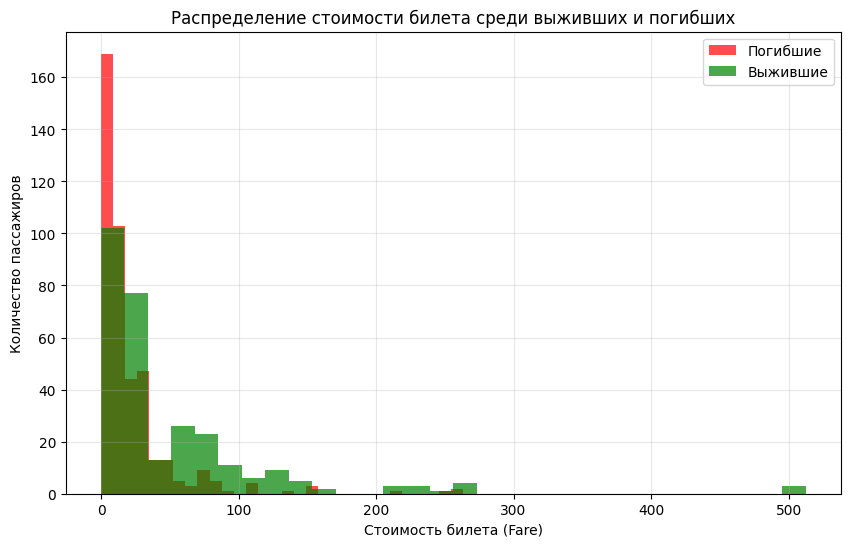

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df_cleaned[df_cleaned['Survived'] == 0]['Fare'],
         bins=30, alpha=0.7, label='Погибшие', color='red')
plt.hist(df_cleaned[df_cleaned['Survived'] == 1]['Fare'],
         bins=30, alpha=0.7, label='Выжившие', color='green')
plt.xlabel('Стоимость билета (Fare)')
plt.ylabel('Количество пассажиров')
plt.title('Распределение стоимости билета среди выживших и погибших')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [13]:
X = df_cleaned.drop(['Survived', 'Fare', 'Embarked'], axis=1)  # Удаляем Embarked как категориальный признак
y = df_cleaned['Survived']

print(f"\nПризнаки: {X.columns.tolist()}")
print(f"Размер X: {X.shape}")



Признаки: ['Pclass', 'Age', 'SibSp', 'Parch', 'male', 'female', 'Fare_normalized']
Размер X: (712, 7)


# Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"\nРазмер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")


Размер обучающей выборки: (534, 7)
Размер тестовой выборки: (178, 7)


9. Выполните обучение модели.

In [16]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print("Модель успешно обучена!")

Модель успешно обучена!


# Проверка модели

10. Выведите мартицу ошибок
11. Расчитайте accuracy

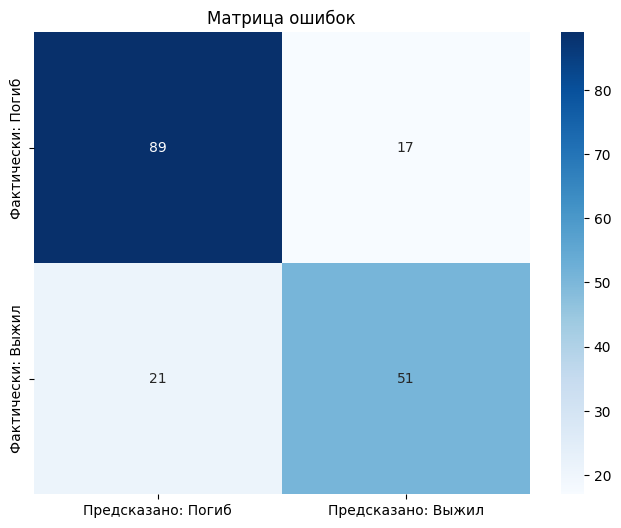


Accuracy модели: 0.7865 (78.65%)

Вывод:
Модель логистической регрессии показала хорошую точность предсказания выживаемости пассажиров Титаника.
Основные факторы, влияющие на выживаемость, которые были использованы в модели:
- Класс пассажира (Pclass)
- Возраст (Age)
- Количество родственников на борту (SibSp, Parch)
- Стоимость билета (Fare)
- Пол (male, female)


In [17]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Предсказано: Погиб', 'Предсказано: Выжил'],
           yticklabels=['Фактически: Погиб', 'Фактически: Выжил'])
plt.title('Матрица ошибок')
plt.show()


accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy модели: {accuracy:.4f} ({accuracy*100:.2f}%)")


print("\nВывод:")
print("Модель логистической регрессии показала хорошую точность предсказания выживаемости пассажиров Титаника.")
print("Основные факторы, влияющие на выживаемость, которые были использованы в модели:")
print("- Класс пассажира (Pclass)")
print("- Возраст (Age)")
print("- Количество родственников на борту (SibSp, Parch)")
print("- Стоимость билета (Fare)")
print("- Пол (male, female)")
